<a href="https://colab.research.google.com/github/Colquida/Examen-final-HPC-USA/blob/main/EDA_Parcial_Final_HPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

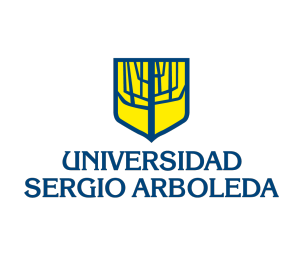

**Examen final**

**Realizado por:** Jonathan Alexander Torres Benítez

**Profesor:** John Jairo Corredor Franco, PhD

**Asignatura:** Computación de Alto Rendimiento (HPC)

**Universidad:** Sergio Arboleda

**Fecha**: 22/11/2022

# 1. Importación de bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, StandardScaler

# 2. Lectura del dataset y preparación previa

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Colquida/Modelos-predictivos/main/breast-cancer-wisconsin.data')

In [3]:
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


> Se observa que el dataset no tiene columnas definidas, por lo cual es necesario investigar las variables involucradas con el dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   1000025  698 non-null    int64 
 1   5        698 non-null    int64 
 2   1        698 non-null    int64 
 3   1.1      698 non-null    int64 
 4   1.2      698 non-null    int64 
 5   2        698 non-null    int64 
 6   1.3      698 non-null    object
 7   3        698 non-null    int64 
 8   1.4      698 non-null    int64 
 9   1.5      698 non-null    int64 
 10  2.1      698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


> Hay una sola columna de tipo categórica. Se sugiere identificar sus elementos haciendo revisión de ella.

Según la [documentación](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29) oficial sobre el dataset, se ofrece información acerca de las columnas 

**Información de atributos**

1. Sample code number: número de muestras
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size (uniformidad del tamaño de la célula): 1 - 10
4. Uniformity of Cell Shape (uniformidad de la forma celular): 1 - 10
5. Marginal Adhesion: (Adhesión marginal): 1 - 10
6. Single Epithelial Cell Size (Tamaño de la célula epitelial única): 1 - 10
7. Bare Nuclei (Núcleos desnudos): 1 - 10
8. Bland Chromatin (Cromatina suave): 1 - 10
9. Normal Nucleoli (Nucléolos normales): 1 - 10
10. Mitoses (Mitosis): 1 - 10
11. Class: (2 for benigno, 4 para maligno)

> Se desplazan los valores presentes en las columnas una posición debajo y se asigna un nombre a cada columna.

In [5]:
l = ['Sample code number','CLump Thickness','Uniformity of Cell Size', 'Uniformity of Cell Shape','Marginal Adhesion', 
     'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli','Mitoses',
     'Class']
df = (df.T.reset_index().T.reset_index(drop=True)
            .set_axis([l[i] for i in range(df.shape[1])], axis=1))

> Finalmente se elimina la primera fila del dataframe. Otra forma habría sido convertir sus valores (de tipo flotante originalmente) a enteros. 

In [6]:
df = df.iloc[1:,:]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 1 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           698 non-null    object
 1   CLump Thickness              698 non-null    object
 2   Uniformity of Cell Size      698 non-null    object
 3   Uniformity of Cell Shape     698 non-null    object
 4   Marginal Adhesion            698 non-null    object
 5   Single Epithelial Cell Size  698 non-null    object
 6   Bare Nuclei                  698 non-null    object
 7   Bland Chromatin              698 non-null    object
 8   Normal Nucleoli              698 non-null    object
 9   Mitoses                      698 non-null    object
 10  Class                        698 non-null    object
dtypes: object(11)
memory usage: 60.1+ KB


> Se muestra información estadística acerca de cada columna del dataframe, esto contempla la cantidad de datos, promedio, desviación, valor máximo, valor mínimo y los percentiles hallados.

In [8]:
df.describe()

,Sample code number,CLump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,698,698,698,698,698,698,698,698,698,698,698
unique,644,10,10,10,10,10,11,10,10,9,2
top,1182404,1,1,1,1,2,1,2,1,1,2
freq,6,145,383,352,406,385,401,166,442,578,457


> Explorando la columna de tipo **object** Barei Nuclei

In [9]:
(df['Bare Nuclei']=='?').sum()

16

In [10]:
df.shape[0]

698

> Se encontró en la columna **Bare Nuclei** caracteres especiales que no representan algún número. Como tal, esto impedirá hacer cualquier tipo de cálculo y predicción si se usa esta columna. Por ello, se omiten las filas involucradas con estos valores.

In [11]:
df = df[df['Bare Nuclei']!='?'] #Se eliminan los caracteres desconocidos

El nuevo dataframe contiene valores de cadenas de caracteres a pesar de ser de tipo flotante originalmente. Por ello se hace una conversión a tipo flotante. 

In [12]:
df = df.astype(int)

# 3. Análisis Exploratorio de Datos

Se realiza la consulta que comprueba la no-existencia de campos nulos:

In [13]:
#Conteo de campos nulos (No hay)
df[df.isna()==True].count()

Sample code number             0
CLump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

Por tanto, se establece que no hay que imputar datos. Mas sí se debe normalizarlos.

De acuerdo con lo requerido, se realiza el cálculo de los promedios y desviaciones para cada columna:

In [14]:
for i in df.columns:
  print(f'El promedio de {i} es de {round(df[i].mean(),3)} y la desviación es de {round(df[i].std(),3)} \n')

El promedio de Sample code number es de 1076832.683 y la desviación es de 621092.603 

El promedio de CLump Thickness es de 4.441 y la desviación es de 2.823 

El promedio de Uniformity of Cell Size es de 3.154 y la desviación es de 3.066 

El promedio de Uniformity of Cell Shape es de 3.218 y la desviación es de 2.99 

El promedio de Marginal Adhesion es de 2.833 y la desviación es de 2.866 

El promedio de Single Epithelial Cell Size es de 3.236 y la desviación es de 2.224 

El promedio de Bare Nuclei es de 3.548 y la desviación es de 3.645 

El promedio de Bland Chromatin es de 3.446 y la desviación es de 2.451 

El promedio de Normal Nucleoli es de 2.872 y la desviación es de 3.054 

El promedio de Mitoses es de 1.604 y la desviación es de 1.734 

El promedio de Class es de 2.701 y la desviación es de 0.955 



> Se comparan los resultados obtenidos sobre la desviación y promedio frente a los impresos en este cuaderno. Se puede comprobar que efectivamente corresponden y varían ligeramente. 

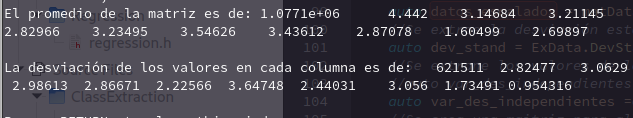

> Posteriormente, se realizan los diagramas de caja para observar si hay la presencia de outliers en el dataframe. Se puede observar que entre estas columnas, hay algunas que presentan datos más datos atípicos. 

1. Sample code number

Columnas como Marginal Adhesion, Single Epithelial Cell Size, Bland Chromatin, Normal Nucleoli y Mitoses parecen presentar outliers. No obstante, se presentan en una escala más reducida frente a Sample code number.


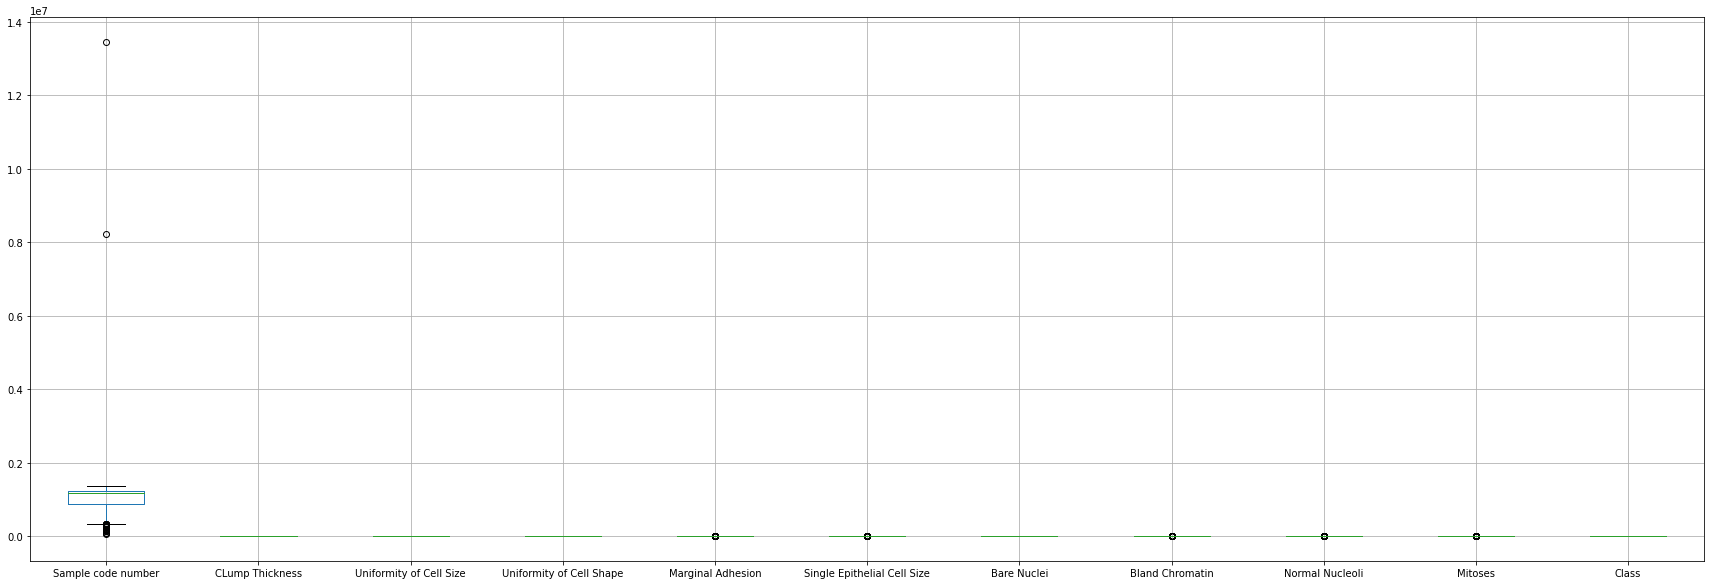

In [15]:
plt.figure(figsize=(30,10))
df.boxplot()
plt.show()

# 3.1 Exploración visual de las columnas.

La variable que se espera predecir: Class, tiene dos categorías: 

1. 2 para la presencia de tumores benignos.
2. 4 para la presencia de tumores malignos. 

Según el histograma de esta columna se puede ver que hay una distribución de muestras sesgada hacia la presencia de tumores benignos. 


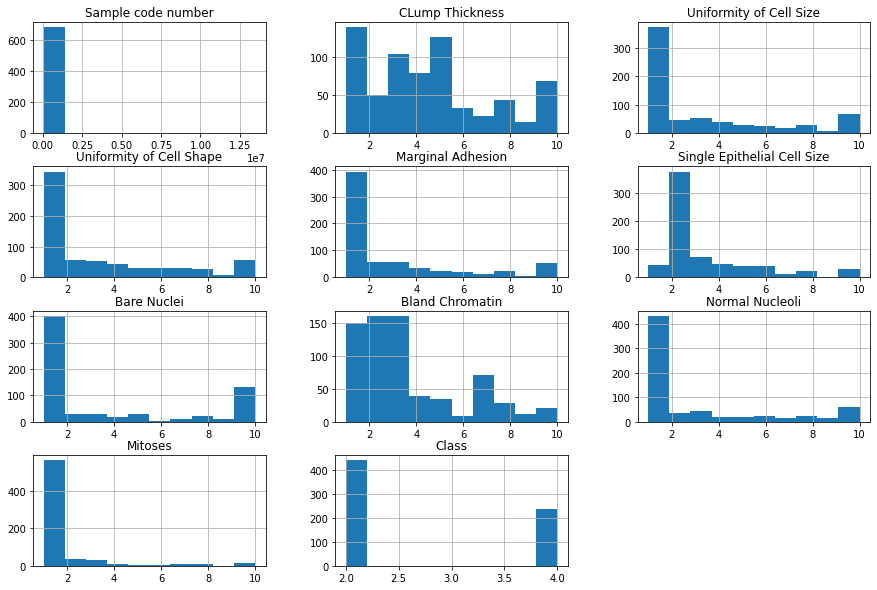

In [16]:
df.hist(figsize=(15,10))
plt.show()

> Diagrama de violín en el que se modela el comportamiento de Marginal Adhesion y Single Epithelial Cell Size usando como diferenciador a la clase. De esta manera, se distribuyen en dos grupos:

* Tumores benignos (2)
* Tumores malignos (4)

Se espera identificar la correlación que pueda haber en estas variables con respecto de la aparición del tipo de tumor.

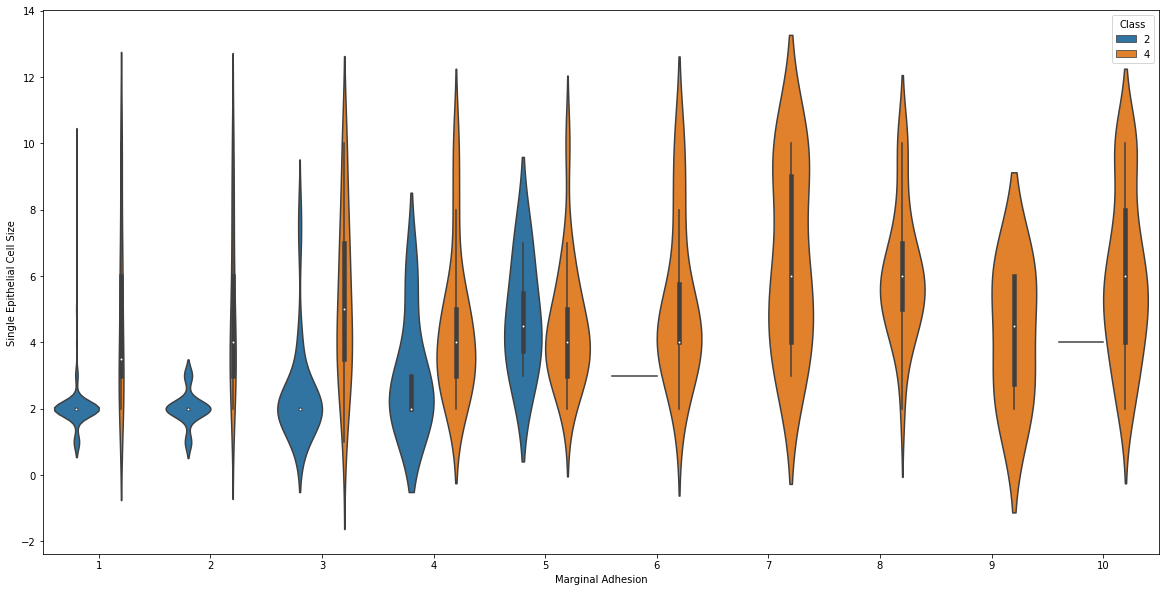

In [17]:
plt.figure(figsize=(20,10))
sns.violinplot(data=df, x = "Marginal Adhesion", y= 'Single Epithelial Cell Size', hue='Class')
plt.show()

# 4. Etapas posteriores

1. Normalización de dataframe
2. División de los datos
3. Mapa de calor para la observación de correlaciones
4. Diagrama de cajas tras la normalización de la data

**Inciso 2. División de los datos:**

* 1.1. Se crean dos variables x y y. La primera contiene todas las columnas, excepto la variable a predecir. En cambio, y, es la variable a predecir. 


In [18]:
x, y = df.drop(['Class'],axis=1), df['Class']
x = (x - np.min(x))/(np.max(x) - np.min(x)).values #Para normalizar la data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

> Las variables de entrenamiento han recibido el 80% de la data, mientras que las variables de prueba el 20%. (Aplica tanto para x como para y)

In [19]:
X_train.shape[0] #Tamaño necesario para enviar en el modelo de C++

545

In [20]:
print(f'El conjunto de X_train tiene el {round((X_train.shape[0]/df.shape[0])*100,3)}% de los datos')

El conjunto de X_train tiene el 79.912% de los datos


In [21]:
print(f'El conjunto de X_test tiene el {round((X_test.shape[0]/df.shape[0])*100,3)}% de los datos')

El conjunto de X_test tiene el 20.088% de los datos


**Inciso 3. Mapa de calor para observar la correlación de los datos**

* 3.1 Se ha creado un mapa de calor con el fin de observar cómo las variables independientes están interactuando entre sí. De esa manera, se podrá realizar un análisis de proporcionalidad entre estas, lo cual puede usarse para explicar el comportamiento de las variables y su papel en el conjunto de datos. 

* 3.2 De acuerdo con el mapa de calor, se observa que Sample code number tiene una correlación débil con otras clases. Esto puede deberse a su naturaleza como identificador de muestras únicas, por lo que su valor no incide sobre el compotamiento presentado en las otras columnas.

* 3.3 En general, las variables tienen una correlación positiva intermedia a fuerte entre sí. (Igual o superior a 0.5), siendo casos notables de excepción Mitoses que ronda por 0.45+


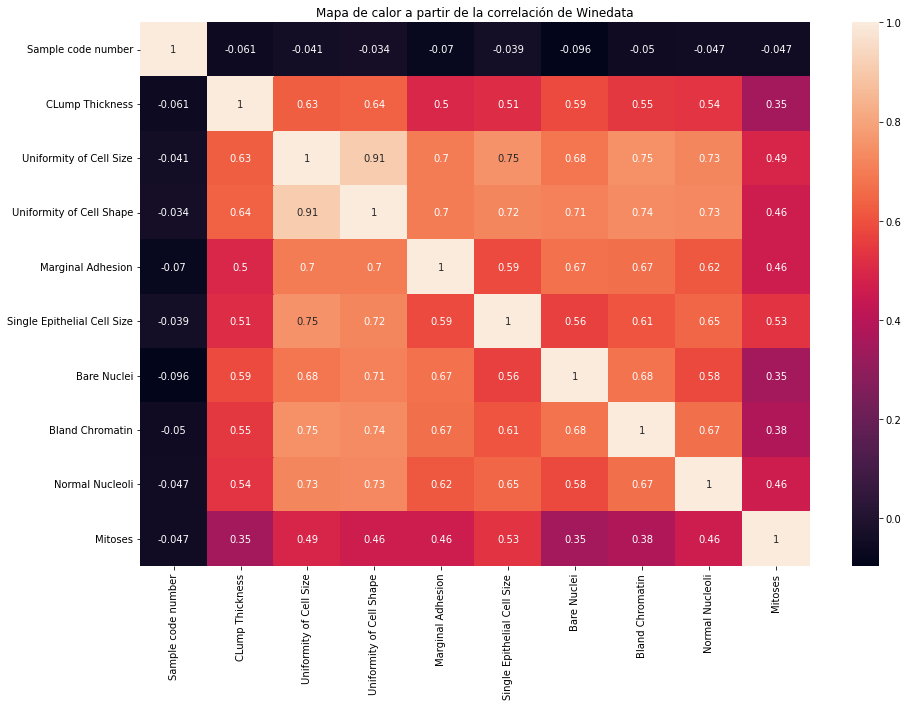

In [22]:
plt.figure(figsize=(15,10))
plt.title("Mapa de calor a partir de la correlación de Winedata")
sns.heatmap(X_train.corr(), annot=True)
plt.show()

> **Impresión de los diagramas de cajas usando una distribución normal.**



*   Ahora los datos se encuentran en una misma escala, por lo que la presencia de outliers para todas las clases es más notable. Compárese este diagrama de cajas con respecto del anterior y clases como por ejemplo Mitoses y la identificación es mucho más visible.

* Se sugiere el uso del rango intercuartílico para definir los umbrales para establecer el comienzo de outliers. Una vez identificados estos datos, realizar la técnica de eliminación de outliers e imputación correspondiente. (Ya sea con la media o con técnicas como KNN)



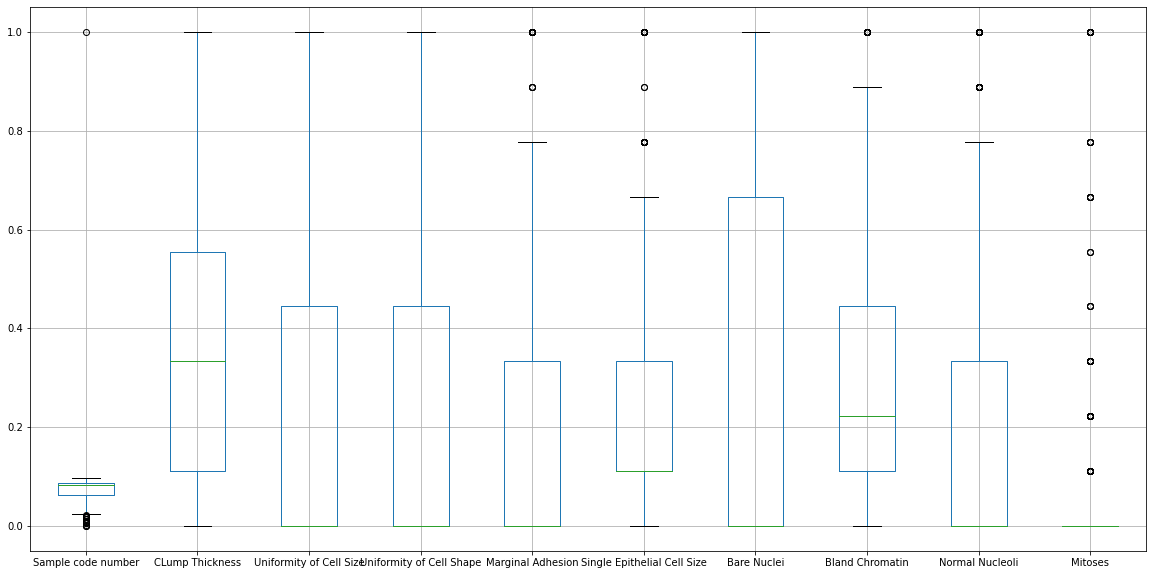

In [23]:
X_train.boxplot(figsize=(20,10))

# Creación del modelo de Regresión Lineal

In [24]:
lr_model = LinearRegression()

> Se crea una variable resultado que contiene el modelo entrenado usando a X_train y y_train

In [25]:
resultado = lr_model.fit(X_train,y_train)

> Finalmente, se evalúa la puntuación del modelo como se puede observar en la siguiente línea.

In [26]:
print(f'La puntuación del modelo es del {round(resultado.score(X_train, y_train),4)}%')

La puntuación del modelo es del 0.8507%


In [27]:
y_test.size

137

# Cálculo del coeficiente de determinación

Cálculo del coeficiente de determinación R2. Con esto se busca puntuar la regresión.  

In [28]:
predict = resultado.predict(X_test)
r2 = r2_score(y_test, predict)
print(f'El coeficiente de determinación del modelo es de {round(r2,4)}')

El coeficiente de determinación del modelo es de 0.8055


In [29]:
mse = mean_squared_error(y_test, predict)
print(f'El error cuadrático medio es de {round(mse,4)} y el RMSE es de {round(np.sqrt(mse),4)}')

El error cuadrático medio es de 0.1675 y el RMSE es de 0.4093


La siguiente imagen corresponde a los resultados obtenidos usando C++ lo cuales son cercanos pero no exactos a los que ofrece Python.

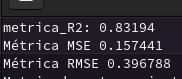

# Métricas de rendimiento

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

> Matriz de confusión para hacer inspección de los casos predichos como verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos. 

In [31]:
clf = SVC(random_state=0)
clf.fit(X_train, y_train)

SVC(random_state=0)

In [32]:
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)

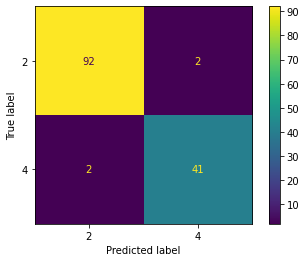

In [33]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

In [34]:
# De acuerdo con los valores de la matriz de confusión, se calcula el accuracy
acc_cm = (cm[0][0] + cm[-1][-1])/np.sum(cm)
print(f'El accuracy según la matriz de confusión es {round(acc_cm,4)}')

El accuracy según la matriz de confusión es 0.9708


> Comprobación del accuracy score utilizando sklearn

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [36]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [37]:
acc_score = accuracy_score(y_test, y_pred)
print(f'El accuracy del modelo es de  es {round(acc_score,4)}')

El accuracy del modelo es de  es 0.9708


> Puntaje de precision

In [38]:
print('La precision del modelo tiene un valor de: %.4f' % precision_score(y_test, y_pred, pos_label=2))

La precision del modelo tiene un valor de: 0.9787


> Puntaje de Recall

In [39]:
print('El Recall del modelo tiene un valor de: %.4f' % recall_score(y_test, y_pred, pos_label=2))

El Recall del modelo tiene un valor de: 0.9787


> Puntaje utilizando la métrica F1

In [40]:
print('F1 Score: %.4f' % f1_score(y_test, y_pred, pos_label=2))

F1 Score: 0.9787


> Por tanto se observa que las tres métricas de clasificación tienen el mismo valor. 

> Como norma de buena práctica y evitando un excenario ideal, se utiliza un Pipeline para maquetar el uso de las clases para la puntuación del modelo. En este Pipeline se encapsuló una clase que permite escalar los datos y un descenso del gradiente. Al final, este pipeline entrenará estos conjuntos de prueba y con él será posible determinar el puntaje el cual efectivamente es del 85% 

In [41]:
pipeline = Pipeline([("Escalado", StandardScaler()),
                      ("SGD Regressor", SGDRegressor(max_iter=1000))])
sgd_eval = pipeline.fit(X_train,y_train)

In [42]:
print(f'La puntuación usando descenso del gradiente es {round(sgd_eval.score(X_train, y_train),5)}')

La puntuación usando descenso del gradiente es 0.85022


# Exportación del nuevo dataframe (limpio)

In [43]:
df.to_csv("breast-cancer-definitivo_yep.csv", header=False, index=False)

# Conclusiones

**Objetivos Específicos:**

* Seleccionar un dataset (único por ingeniero)
* Hacer una análitica de datos sobre el dataset seleccionado
* Modelar usando la regresión lineal usando: Python,  Scikit-Learn
* Modelar usando la regresión lineal usando: C++
* Comparar los modelos

#1. Selección del dataset

El objetivo de la selección del dataset es evaluar si un bulto mamario podría ser reconocido como benigno (no canceroso) o maligno (canceroso). Lo anterior usando imágenes que han sido digitalizadas de una biopsia por aspiración con aguja fina. 

* 1.1  Dado que la variable a predecir puede tener dos estados (2 para benigno, 4 para maligno), la problemática planteada es de clasificación binaria. 

* 1.2 El dataset a trabajar es un archivo cuyos valores están separados por comas (csv), por lo tanto, es posible utilizar la biblioteca de Pandas (en Python) de forma directa para la lectura del mismo.

* 1.3 Se elige un dataset compuesto únicamente por valores numéricos esencialmente para evitar la conversión de valores tipo String. Allí radica la importancia de la limpieza de las variables y la conversión de tipos a Integer en caso de ser necesaria. 

* 1.4 Se establece que el objetivo es el modelamiento de la probabilidad de la aparición y/o existencia de un tumor maligno, teniendo en cuenta las características de la prueba de aspiración con aguja fina (biopsia).

# 2. Analítica de datos sobre el dataset seleccionado

* 2.1 Con las métricas de rendimiento (Tomando como base la matriz de confusión), se identifica que los casos verdaderos positivos son la frecuencia con la que el modelo predijo de manera correcta el que un tumor fuera realmente benigno. Los falsos positivos en cambio, muestran la frecuencia con la que el modelo predijo que el tumor era benigno cuando en realidad era benigno. 

* Los casos verdaderos negativos por su parte, indican cómo el modelo predice de forma correcta que un tumor es maligno. Finalmente, los falsos negativos indican la frecuencia con la que el modelo predijo que un tumor era maligno cuando realmente no lo era. 

* 2.2 Se observó durante la exploración de datos la ausencia de valores faltantes a excepción de la columna Barei Nuclei que tenía caracteres no identificados, denotados por la cadena '?', lo que implica que al momento de su inserción fueron determinados registros no identificados.

* 2.3 Los valores de las columnas (exceptuando Class que es la variable a predecir y Sample que son los identificadores de muestras) sugieren una cantidad de la presencia/concentración de la variable en la muestra determinada. 

* 2.4 El mapa de calor a grandes rasgos permite observar una relación entre las variables es de proporcionalidad directa, lo que implicaría la correlación positiva que hay entre estas. 

* 2.5 Este literal es un placeholder donde se escribirá más a detalle sobre cada una de las variables del dataset (brevemente descritas al comienzo del documento)

# 2.5 Documentación sobre las variables presentes:



1.   Clump Thickness: Las células que son benignas tienden a agruparse en monocapas. En cambio, las que son cancerosas generalmente se agrupan en múltiples capas.

2.  Uniformity of Cell Size: Las células que son cancerosas tienden a variar en tamaño y forma. Por esta razón, variables como estas tienen alto grado de valor para determinar si las células son o no cancerosas.

3. Uniformity of Cell Shape: Similarmente a lo ya descrito, las células cancerosas suelen variar en tamaño y forma. Por ello, estas variables son valiosas para determinar si las células son o no cancerosas.

4. Marginal Adhesion: Normalmente, las células tienden a pegarse entre sí. Por otra parte, las que son cancerosas suelen perder esta habilidad. Por lo tanto, la pérdida de adhesión indica un signo de malignidad.

5. Single Epithelial Cell Size: Tiene una relación estrecha con la uniformidad anteriormente descrita. Las célculas epiteliales cuyo tamaño es grande pueden ser células malignas.

6. Barei Nuclei: Se refiere a los núcleos que no están rodeados por citoplasma. Se observan usualmente en tumores benignos.

7. Bland Chromatin: Las células benignas suelen tener una textura uniforme en su núcleo. En cambio, en las que son cancerosas, la cromatina suele ser más gruesa.

8. Normal Nucleoli: Los nucléolos son estructuras pequeñas que pueden verse en el núcleo. Cuando las células son normales, el nucléolo es muy pequeño (si acaso es visible), mientras que en las célculas cancerosas, los nucléolos son más prominentes.

9. Mitoses: En esencia, el cáncer es una enfermedad de mitosis no controlada.

10. Class: (Valores de 2 y 4), donde 2 es un tumor benigno y 4 un tumor cancerígeno en una mama. 



# 3. Modelamiento usando la regresión lineal a través de Python y Scikit-Learn

* 3.1 Con un valor de puntuación de 0.85/1 en el modelo sobre las variables de entrenamiento, este es el coeficiente de determinación, lo que implica que el modelo tiene un alto ajuste con la variable Class (predicción), por lo tanto, se puede concluir que el modelo es fiable. 

* 3.2 Con un valor de puntuación de 0.80/1 en el modelo sobre las variables de prueba, este se calculó utilizando R2_score de Sklearn, también conocido como puntuación R2, lo cual representa que de 10 casos sujetos a predicción acertará satisfactoriamente sobre 8 de ellos. 

* 3.3 Se observa que el error cuadrático medio tiene un valor de pérdida de 0.1675. Como función de riesgo, corresponde al valor esperado de esta pérdida de error al cuadrado (por eso nunca tendrá un valor negativo). Como su valor es cercano a cero (0) se puede decir que la línea de regresión tiene un gran ajuste con respecto de lo que se espera.

* 3.4 Se usaron distintas métricas de rendimiento para clasificación. Accuracy, Precision, Recall y F1 Score. Las 3 sobre el 97% garantizando la calidad del modelo realizado debido al alto porcentaje de encontrar casos positivos (identificación de tumores benignos). 





# 4. Modelamiento usando la regresión lineal en C++

* 4.1 Se observa durante la práctica cómo desde un punto de vista algebraico y en sintaxis, Eigen es un predecesor de la biblioteca conocida como Numpy. Mientras que estas bibliotecas están automatizadas en su manejo y cálculos, ofreciendo más flexibilidad y accesibilidad a la gama de técnicas disponibles, una regresión lineal puede ser modelada a través de Eigen, no obstante, apalancándose fuertemente en la conceptualización matemática y algebráica (ya que la representación de los datos es tratada a nivel matricial y vectorial).

* 4.2 La ligera divergencia entre los valores obtenidos entre Python-Sklearn y C++-Eigen puede deberse al uso en el caso de Eigen de una técnica similar pero no igual que la nativa que tiene por defecto la media y desviación (en Numpy) así como el modelo de regresión lineal. Asimismo, otra de las posibles razones se encuentra en los tipos de datos presentes en el dataset ya que el modelo creado en C++ espera datos de tipo flotante y en cambio se le fue entregado datos de tipo entero, y a nivel acumulativo eso puede haber interferido en la precisión de los valores cuando se los compara en el modelo desarrollado en C++ y Python. 

* 4.3 Se pudo establecer que el modelo específicado de regresión lineal desarrollado y utilizado en C++ está configurado para tratar a la última columna del dataset como la variable a predecir, por lo tanto, es importante, identificar esta última columna y no alguna de las otras porque la diferencia es los resultados es significativa. 

* 4.4 Desde el punto de vista de la eficiencia a nivel de programación como usuario, Python es un lenguaje mucho más flexible de usar, por ello se entiende mejor que sea de alto nivel. Por ejemplo, en el modelo creado en C++, el usuario debe conocer con precisión los tamaños de las matrices tras la división de los datos para que su conjunto de datos sea procesado exitosamente, hecho que se puede conocer haciendo un debug, pero no inmediatamente identificable, hecho que no sucede con Python porque ya tiene bibliotecas especializadas en la gestión automática de los datos divididos en conjuntos de entrenamiento y de prueba. 

# 5. Comparación de modelos (C++ y Python)

* 5.1 Como ya se mencionó antes, ambos modelos satisfactoriamente cumplen con el requerimiento de una regresión lineal con una curva que se ajusta adecuadamente a la distribución de los datos con un error cuadrático medio que es bajo (inferior al 15%) para el problema de clasificación del conjunto de datos. Por lo que se puede concluir que de cien personas, 85 puede que tengan un tumor benigno, las otras 15 pueden tener un tumor maligno. 

* 5.2 Se observa que a falta de un conjunto de datos lo suficiente grande y técnicas de observación (aunque desde un principio no era el objetivo de la práctica), no se comparó cuál de los modelos en términos de rendimiento (tiempo) fue el mejor. Si el desarrollado en C++ o el que escrito en Python. Habría sido interesante realizar el Benchmarking.

* 5.3 La puntuación del modelo fue mayor en el desarrollado en C++ con una diferencia de alrededor del 2%, se cree que es debido a las ligeras diferencias entre los tipos de datos (entero (dataset) frente a flotante (tipo de dato por procesar en C++))

* 5.4 Se pudo observar que ambos modelos funcionan para tipos de problemas de clasificación binaria. 

# Recomendaciones

1. Se sugiere la eliminación de la variable Sample Code Number puesto que se determinó que no tiene un peso real sobre otras variables, siendo que esta sirve únicamente como identificador de cada registro. Lo anterior, con el fin de optimizar el modelo. Dado que son identificadores, no vale el esfuerzo de utilizar técnicas de eliminación de outliers.

2. En general, la búsqueda de optimizar el modelo podría acabar en overfitting dado que su rendimiento ha sido alto, y como se puede ver en la matriz de confusión son respectivamente dos casos (cuatro en total) los predichos como erróneos, lo cual incluso podría sugerir que el modelo ha sido bastante idealista. Se sugiere una revisión exhaustiva de variables, o bien esto es solo señal de que el conjunto de datos efectivamente es usado como material de estudio para aquellos que se adentren en las artes de las Ciencias de Datos

# Referencias

En general, para el desarrollo de la práctica se utilizó la documentación de [Scikitlearn](https://scikit-learn.org/stable/index.html) para el uso de la sintaxis, definiciones, etc.

Learn, S. Sklearn.metrics.r2_score, scikit. Disponible en: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html (Accedido: Noviembre 23, 2022). 

Irvine, U.C. Breast Cancer Wisconsin (Original) Data Set , UCI Machine Learning Repository: Breast Cancer wisconsin (original) data set. Disponible en: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29 (Accedido: Noviembre 23, 2022). 

Wolberg, W.H., & Mangasarian, O.L. (1990). Multisurface method of pattern separation for medical diagnosis applied to breast cytology. In Proceedings of the National Academy of Sciences, 87, 9193--9196.

Zhang, J. (1992). Selecting typical instances in instance-based learning. In Proceedings of the Ninth International Machine Learning Conference (pp. 470--479). Aberdeen, Scotland: Morgan Kaufmann.